#  Занятие 7
# Деревья решений. Ансамбли моделей.


Понятие дерева решений. Алгоритмы построения деревьев решений. Гиперпараметры дерева решений. Создание модели в sklearn.
Ансамбли деревьев решений (случайный лес и бустинги).



###### Деревья решений представляют собой иерархические древовидные структуры, состоящие из решающих правил вида «Если ..., то ...».

Правила автоматически генерируются в процессе обучения на обучающем множестве и, поскольку они формулируются практически на естественном языке (например, «Если объём продаж более 1000 шт., то товар перспективный»), деревья решений как аналитические модели более вербализуемы и интерпретируемы, чем, скажем, нейронные сети.

Поскольку правила в деревьях решений получаются путём обобщения множества отдельных наблюдений (обучающих примеров), описывающих предметную область, то по аналогии с соответствующим методом логического вывода их называют индуктивными правилами, а сам процесс обучения — индукцией деревьев решений.

В обучающем множестве для примеров должно быть задано целевое значение, т.к. деревья решений являются моделями, строящимися на основе обучения с учителем. При этом, если целевая переменная дискретная (метка класса), то модель называют деревом классификации, а если непрерывная, то деревом регрессии.

Основополагающие идеи, послужившие толчком к появлению и развитию деревьев решений, были заложены в 1950-х годах в области исследований моделирования человеческого поведения с помощью компьютерных систем. Среди них следует выделить работы К. Ховеленда «Компьютерное моделирование мышления» и Е. Ханта и др. «Эксперименты по индукции».

Дальнейшее развитие деревьев решений как самообучающихся моделей для анализа данных связано с именами Джона Р. Куинлена, который разработал алгоритм ID3 и его усовершенствованные модификации С4.5 и С5.0, а так же Лео Бреймана, который предложил алгоритм CART и метод случайного леса.

**Дерево решений** — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — **узлов (node)** и **листьев (leaf)**. В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

![image.png](attachment:image.png)

Затем к каждому подмножеству вновь применяется правило и процедура рекурсивно повторяется пока не будет достигнуто некоторое условие остановки алгоритма. В результате в последнем узле проверка и разбиение не производится и он объявляется листом. Лист определяет решение для каждого попавшего в него примера. Для дерева классификации — это класс, ассоциируемый с узлом, а для дерева регрессии — соответствующий листу модальный интервал целевой переменной.

Таким образом, в отличие от узла, в листе содержится не правило, а подмножество объектов, удовлетворяющих всем правилам ветви, которая заканчивается данным листом.

Очевидно, чтобы попасть в лист, пример должен удовлетворять всем правилам, лежащим на пути к этому листу. Поскольку путь в дереве к каждому листу единственный, то и каждый пример может попасть только в один лист, что обеспечивает единственность решения.

Процесс построения деревьев решений заключается в последовательном, рекурсивном разбиении обучающего множества на подмножества с применением решающих правил в узлах. Процесс разбиения продолжается до тех пор, пока все узлы в конце всех ветвей не будут объявлены листьями. Объявление узла листом может произойти естественным образом (когда он будет содержать единственный объект, или объекты только одного класса), или по достижении некоторого условия остановки, задаваемого пользователем (например, минимально допустимое число примеров в узле или максимальная глубина дерева).

Алгоритмы построения деревьев решений относят к категории так называемых жадных алгоритмов. Жадными называются алгоритмы, которые допускают, что локально-оптимальные решения на каждом шаге (разбиения в узлах), приводят к оптимальному итоговому решению. В случае деревьев решений это означает, что если один раз был выбран атрибут, и по нему было произведено разбиение на подмножества, то алгоритм не может вернуться назад и выбрать другой атрибут, который дал бы лучшее итоговое разбиение. Поэтому на этапе построения нельзя сказать обеспечит ли выбранный атрибут, в конечном итоге, оптимальное разбиение.

В основе большинства популярных алгоритмов обучения деревьев решений лежит принцип «разделяй и властвуй». Алгоритмически этот принцип реализуется следующим образом. Пусть задано обучающее множество


каждое из которых включает примеры, содержащие соответствующее значение атрибута. Затем выбирается следующий атрибут и разбиение повторяется. Это процедура будет рекурсивно повторяться до тех пор, пока все примеры в результирующих подмножествах не окажутся одного класса.
Описанная выше процедура лежит в основе многих современных алгоритмов построения деревьев решений. Очевидно, что при использовании данной методики, построение дерева решений будет происходить сверху вниз (от корневого узла к листьям).

В настоящее время разработано значительное число алгоритмов обучения деревья решений: ID3, CART, C4.5, C5.0, NewId, ITrule, CHAID, CN2 и т.д. Но наибольшее распространение и популярность получили следующие:

* **ID3 (Iterative Dichotomizer 3)** — алгоритм позволяет работать только с дискретной целевой переменной, поэтому деревья решений, построенные с помощью данного алгоритма, являются классифицирующими. Число потомков в узле дерева не ограничено. Не может работать с пропущенными данными.

* **C4.5** — усовершенствованная версия алгоритма ID3, в которую добавлена возможность работы с пропущенными значениями атрибутов (по версии издания Springer Science в 2008 году алгоритм занял 1-е место в топ-10 наиболее популярных алгоритмов Data Mining).

* **CART (Classification and Regression Tree)** — алгоритм обучения деревьев решений, позволяющий использовать как дискретную, так и непрерывную целевую переменную, то есть решать как задачи классификации, так и регрессии. Алгоритм строит деревья, которые в каждом узле имеют только два потомка.

## Основные этапы построения
В ходе построения дерева решений нужно решить несколько основных проблем, с каждой из которых связан соответствующий шаг процесса обучения:

* Выбор атрибута, по которому будет производиться разбиение в данном узле (атрибута разбиения).

* Выбор критерия остановки обучения.

* Выбор метода отсечения ветвей (упрощения).

* Оценка точности построенного дерева.

### Выбор атрибута разбиения

При формировании правила для разбиения в очередном узле дерева необходимо выбрать атрибут, по которому это будет сделано. Общее правило для этого можно сформулировать следующим образом: выбранный атрибут должен разбить множество наблюдений в узле так, чтобы результирующие подмножества содержали примеры с одинаковыми метками класса, или были максимально приближены к этому, т.е. количество объектов из других классов («примесей») в каждом из этих множеств было как можно меньше. Для этого были выбраны различные критерии, наиболее популярными из которых стали теоретико-информационный и статистический.

#### Теоретико-информационный критерий
Как следует из названия, критерий основан на понятиях теории информации, а именно — информационной энтропии.

$H = - \sum_{i=1}^n \frac{N_i}{N} log \frac{N_i}{N}$

где $n$ — число классов в исходном подмножестве, $N_i$ — число примеров i-го класса, $N$ — общее число примеров в подмножестве.

Энтропия может рассматриваться как мера неоднородности подмножества по представленным в нём классам. Когда классы представлены в равных долях и неопределённость классификации наибольшая, энтропия также максимальна. Если все примеры в узле относятся к одному классу, т.е. $N_i=N$, логарифм от единицы обращает энтропию в ноль.

Таким образом, лучшим атрибутом разбиения $A_j$ будет тот, который обеспечит максимальное снижение энтропии результирующего подмножества относительно родительского. На практике, однако, говорят не об энтропии, а о величине, обратной ей, которая называется информацией. Тогда лучшим атрибутом разбиения будет тот, который обеспечит максимальный прирост информации результирующего узла относительно исходного:

$Gain(A) = Info(S) - Info(S_A)$

где $Info(S)$ - информация, связанная с подмножеством $S$ до разбиения, $Info(S_A)$ - информация, связанная с подмножеством, полученными при разбиении по атрибуту $A$.

Выбор атрибута разбиения в узле заключается в максимизации величины $Gain(A)$, называемой приростом информации (от англ. gain — прирост, увеличение). Поэтому сам теоретико-информационный подход известен как критерий прироста информации. Он впервые был применён в алгоритме ID3, а затем в C4.5 и других алгоритмах.


#### Статистический подход

В основе статистического подхода лежит использование индекса Джини (назван в честь итальянского статистика и экономиста Коррадо Джини). Статистический смысл данного показателя в том, что он показывает — насколько часто случайно выбранный пример обучающего множества будет распознан неправильно, при условии, что целевые значения в этом множестве были взяты из определённого статистического распределения.

Таким образом индекс Джини фактически показывает расстояние между двумя распределениями — распределением целевых значений, и распределением предсказаний модели. Очевидно, что чем меньше данное расстояние, тем лучше работает модель.

Индекс Джини может быть рассчитан по формуле:
$Gini(Q) = 1 - \sum_{i=1}^n p_i^2$

где $Q$ — результирующее множество, $n$ — число классов в нём, $p_i$ — вероятность i-го класса (выраженная как относительная частота примеров соответствующего класса). Данный показатель меняется от 0 до 1. При этом он равен 0, если все примеры $Q$ относятся к одному классу, и равен 1, когда классы представлены в равных пропорциях и равновероятны. Тогда лучшим будет то разбиение, для которого значение индекса Джини будут минимальным.

## Критерий остановки алгоритма

Теоретически, алгоритм обучения дерева решений будет работать до тех пор, пока в результате не будут получены абсолютно «чистые» подмножества, в каждом из которых будут примеры одного класса. Правда, возможно при этом будет построено дерево, в котором для каждого примера будет создан отдельный лист. Очевидно, что такое дерево окажется бесполезным, поскольку оно будет переобученным — каждому примеру будет соответствовать свой уникальный путь в дереве, а следовательно, и набор правил, актуальный только для данного примера.

Переобучение в случае дерева решений ведёт к тем же последствиям, что и для нейронной сети — точное распознавание примеров, участвующих в обучении и полная несостоятельность на новых данных. Кроме этого, переобученные деревья имеют очень сложную структуру, и поэтому их сложно интерпретировать.



In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [5]:
data = load_iris()

#convert to a dataframe

df = pd.DataFrame(data.data, columns = data.feature_names)

#create the species column

df['Species'] = data.target

#replace this with the actual names

target = np.unique(data.target)

target_names = np.unique(data.target_names)

targets = dict(zip(target, target_names))

df['Species'] = df['Species'].replace(targets)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
x = df.drop(columns="Species")

y = df["Species"]

feature_names = x.columns

labels = y.unique()

X_train, test_x, y_train, test_lab = train_test_split(x,y,

                                                 test_size = 0.4,

                                                 random_state = 42)

In [7]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

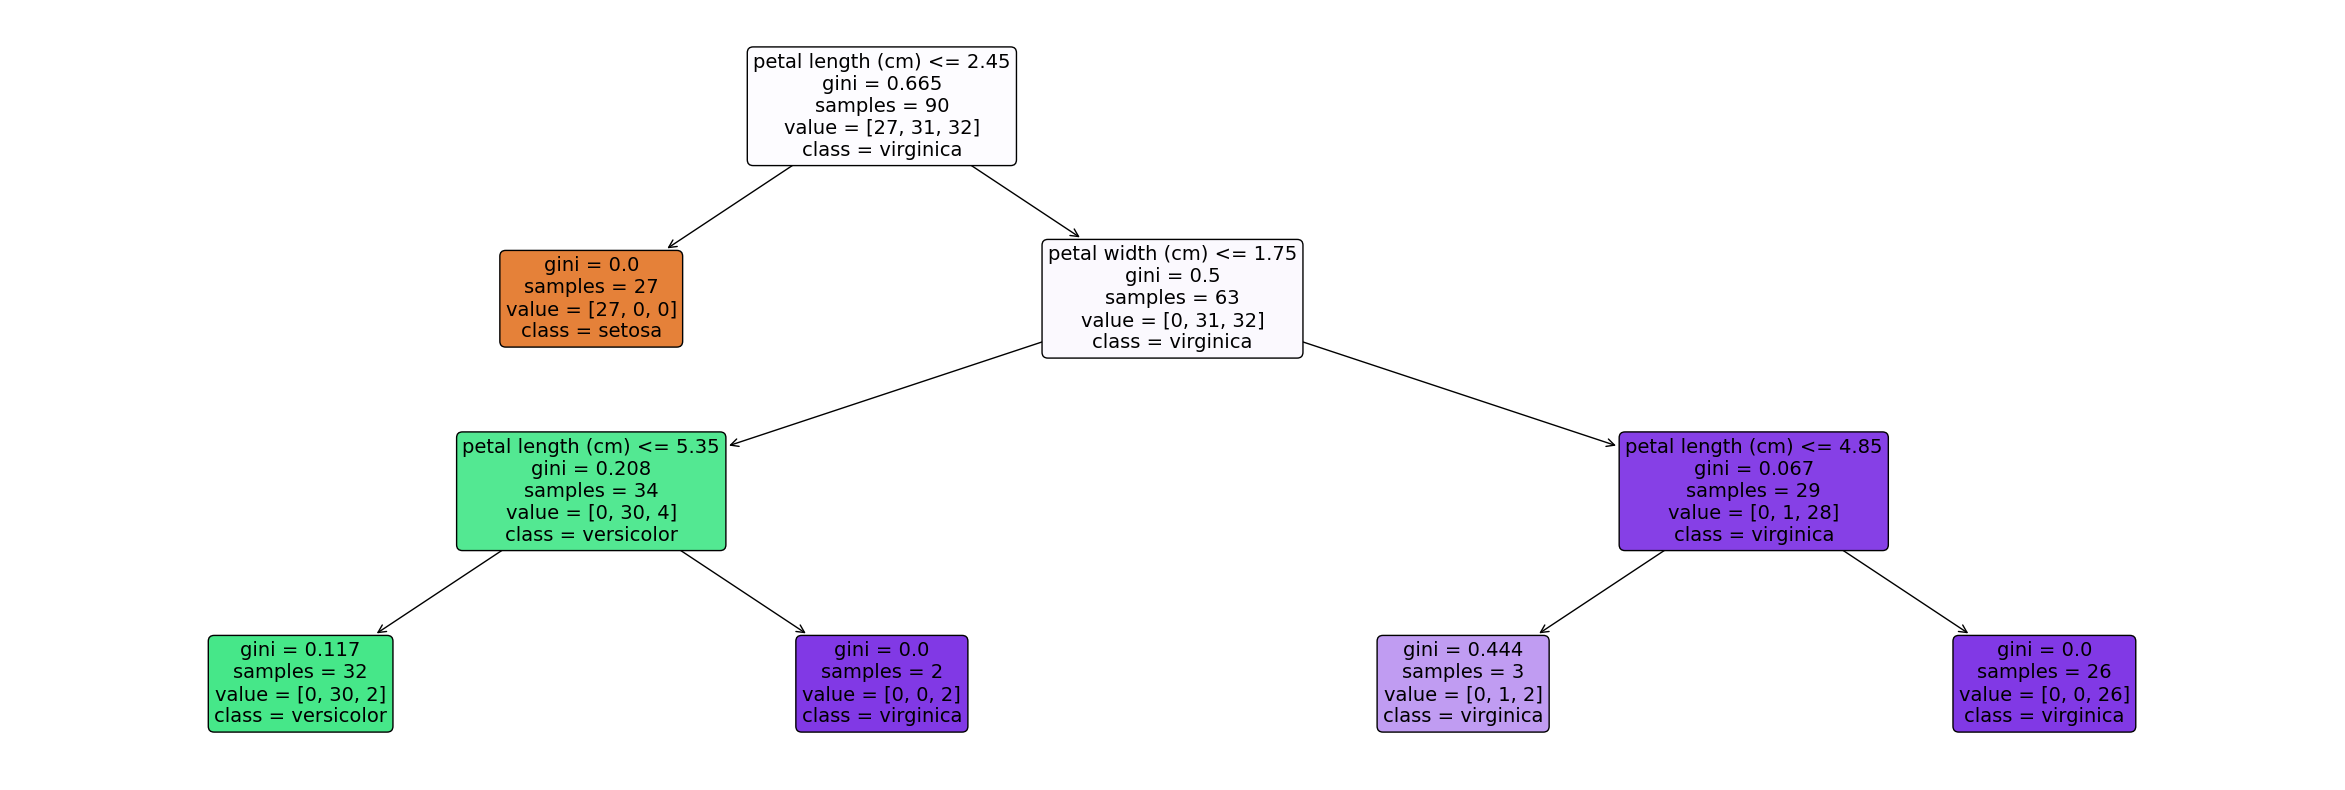

In [8]:
plt.figure(figsize=(30,10), facecolor ='w')

a = tree.plot_tree(clf,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=14)

plt.show()

In [9]:
tree_rules = export_text(clf,

                        feature_names = list(feature_names))

print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



## Подбор гиперпараметров

Подбор гиперпараметров можно выполнять с спомощью методов реализованных в sklearn (GridSearchCV, RandomizedSearchCV) и optuna.

Дополнительно можно посмотреть: https://habr.com/ru/articles/563494/


In [10]:
parametrs = { 'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [11]:
clf = DecisionTreeClassifier(random_state = 42)

In [12]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [13]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

## Ансамбли моделей

В статистике хорошо известно интуитивное соображение, согласно которому усреднение результатов наблюдений может дать более устойчивую и надежную оценку, поскольку ослабляется влияние случайных флуктуаций в отдельном измерении. На аналогичной идее было основано развитие алгоритмов комбинирования моделей, в результате чего построение их ансамблей оказалось одним из самых мощных методов машинного обучения, нередко превосходящим по качеству предсказаний другие методы.

Одним из решений, обеспечивающих необходимое разнообразие моделей, является их повторное обучение на выборках, случайно выбранных из генеральной совокупности, либо иных подмножествах данных, сконструированных из имеющихся (рис. 4.14). Для получения устойчивого прогноза частные предсказания этих моделей тем или иным образом комбинируют, например, с помощью простого усреднения или голосования (возможно, взвешенного).

In [14]:
clf = RandomForestClassifier()

In [15]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [16]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [17]:
grid.best_params_

{'max_depth': 1,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 20}

## Практические задания

1. Используя датасет по медицинским страховкам (https://www.kaggle.com/datasets/mirichoi0218/insurance) выполните предобработку и анализ данных (задание прошлого занятия) и обучите модели дерева решений, случайного леса и бустинг (см. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html). Сравните качество построенных моделей (без подбора гиперпараметров и с подбором гиперпараметров) по метрикам: MAE, MSE, RMSE, MAPE и SMAPE (см. статью по метрикам https://loginom.ru/blog/quality-metrics).


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

In [18]:
df = pd.read_csv('insurance.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


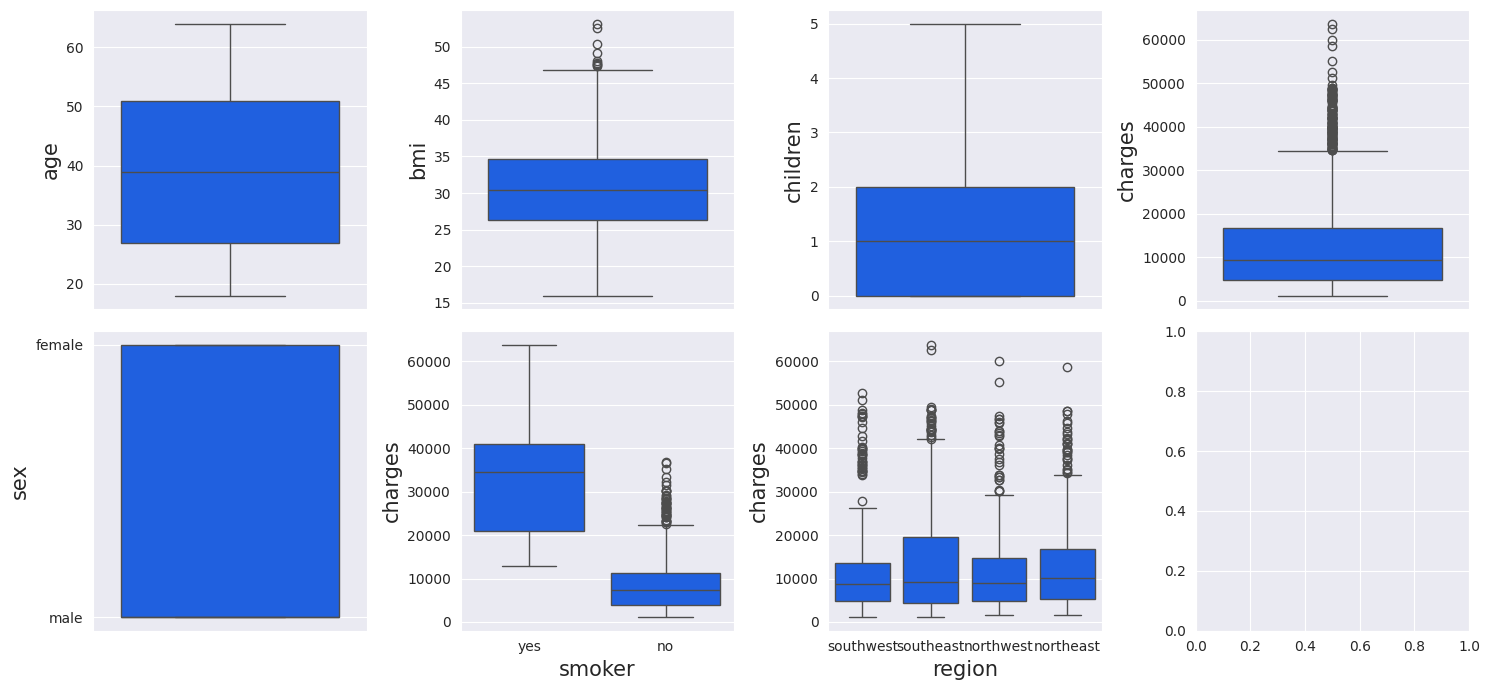

In [23]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,  df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='charges', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [24]:
outliers_indexes = []
target = 'charges'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())


for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

203 outliers were identified, whose indices are:

[516, 1031, 520, 9, 524, 1037, 526, 1039, 14, 1036, 530, 19, 23, 1047, 1049, 539, 29, 30, 543, 34, 549, 1062, 39, 38, 558, 1070, 49, 53, 1078, 55, 569, 573, 62, 1088, 577, 1090, 1093, 1096, 1098, 587, 82, 84, 86, 599, 1111, 1117, 94, 1118, 1120, 609, 1122, 1124, 103, 615, 618, 109, 621, 623, 1139, 115, 629, 1142, 116, 1146, 123, 637, 128, 1152, 641, 1156, 138, 140, 146, 658, 665, 667, 668, 158, 161, 674, 1186, 677, 682, 1196, 175, 688, 689, 1206, 1207, 696, 185, 697, 1211, 706, 1218, 203, 1230, 725, 1240, 1241, 219, 223, 736, 1249, 738, 739, 227, 742, 1258, 240, 242, 1267, 244, 245, 759, 251, 252, 254, 256, 770, 259, 1284, 263, 1288, 265, 1291, 271, 1300, 1301, 1303, 281, 1308, 286, 288, 1313, 289, 803, 292, 1317, 806, 298, 1323, 819, 312, 1337, 314, 826, 828, 321, 322, 327, 328, 330, 842, 845, 847, 850, 338, 852, 856, 860, 355, 876, 883, 373, 377, 890, 379, 381, 893, 387, 901, 401, 917, 925, 419, 420, 421, 422, 936, 430, 947, 951, 441,

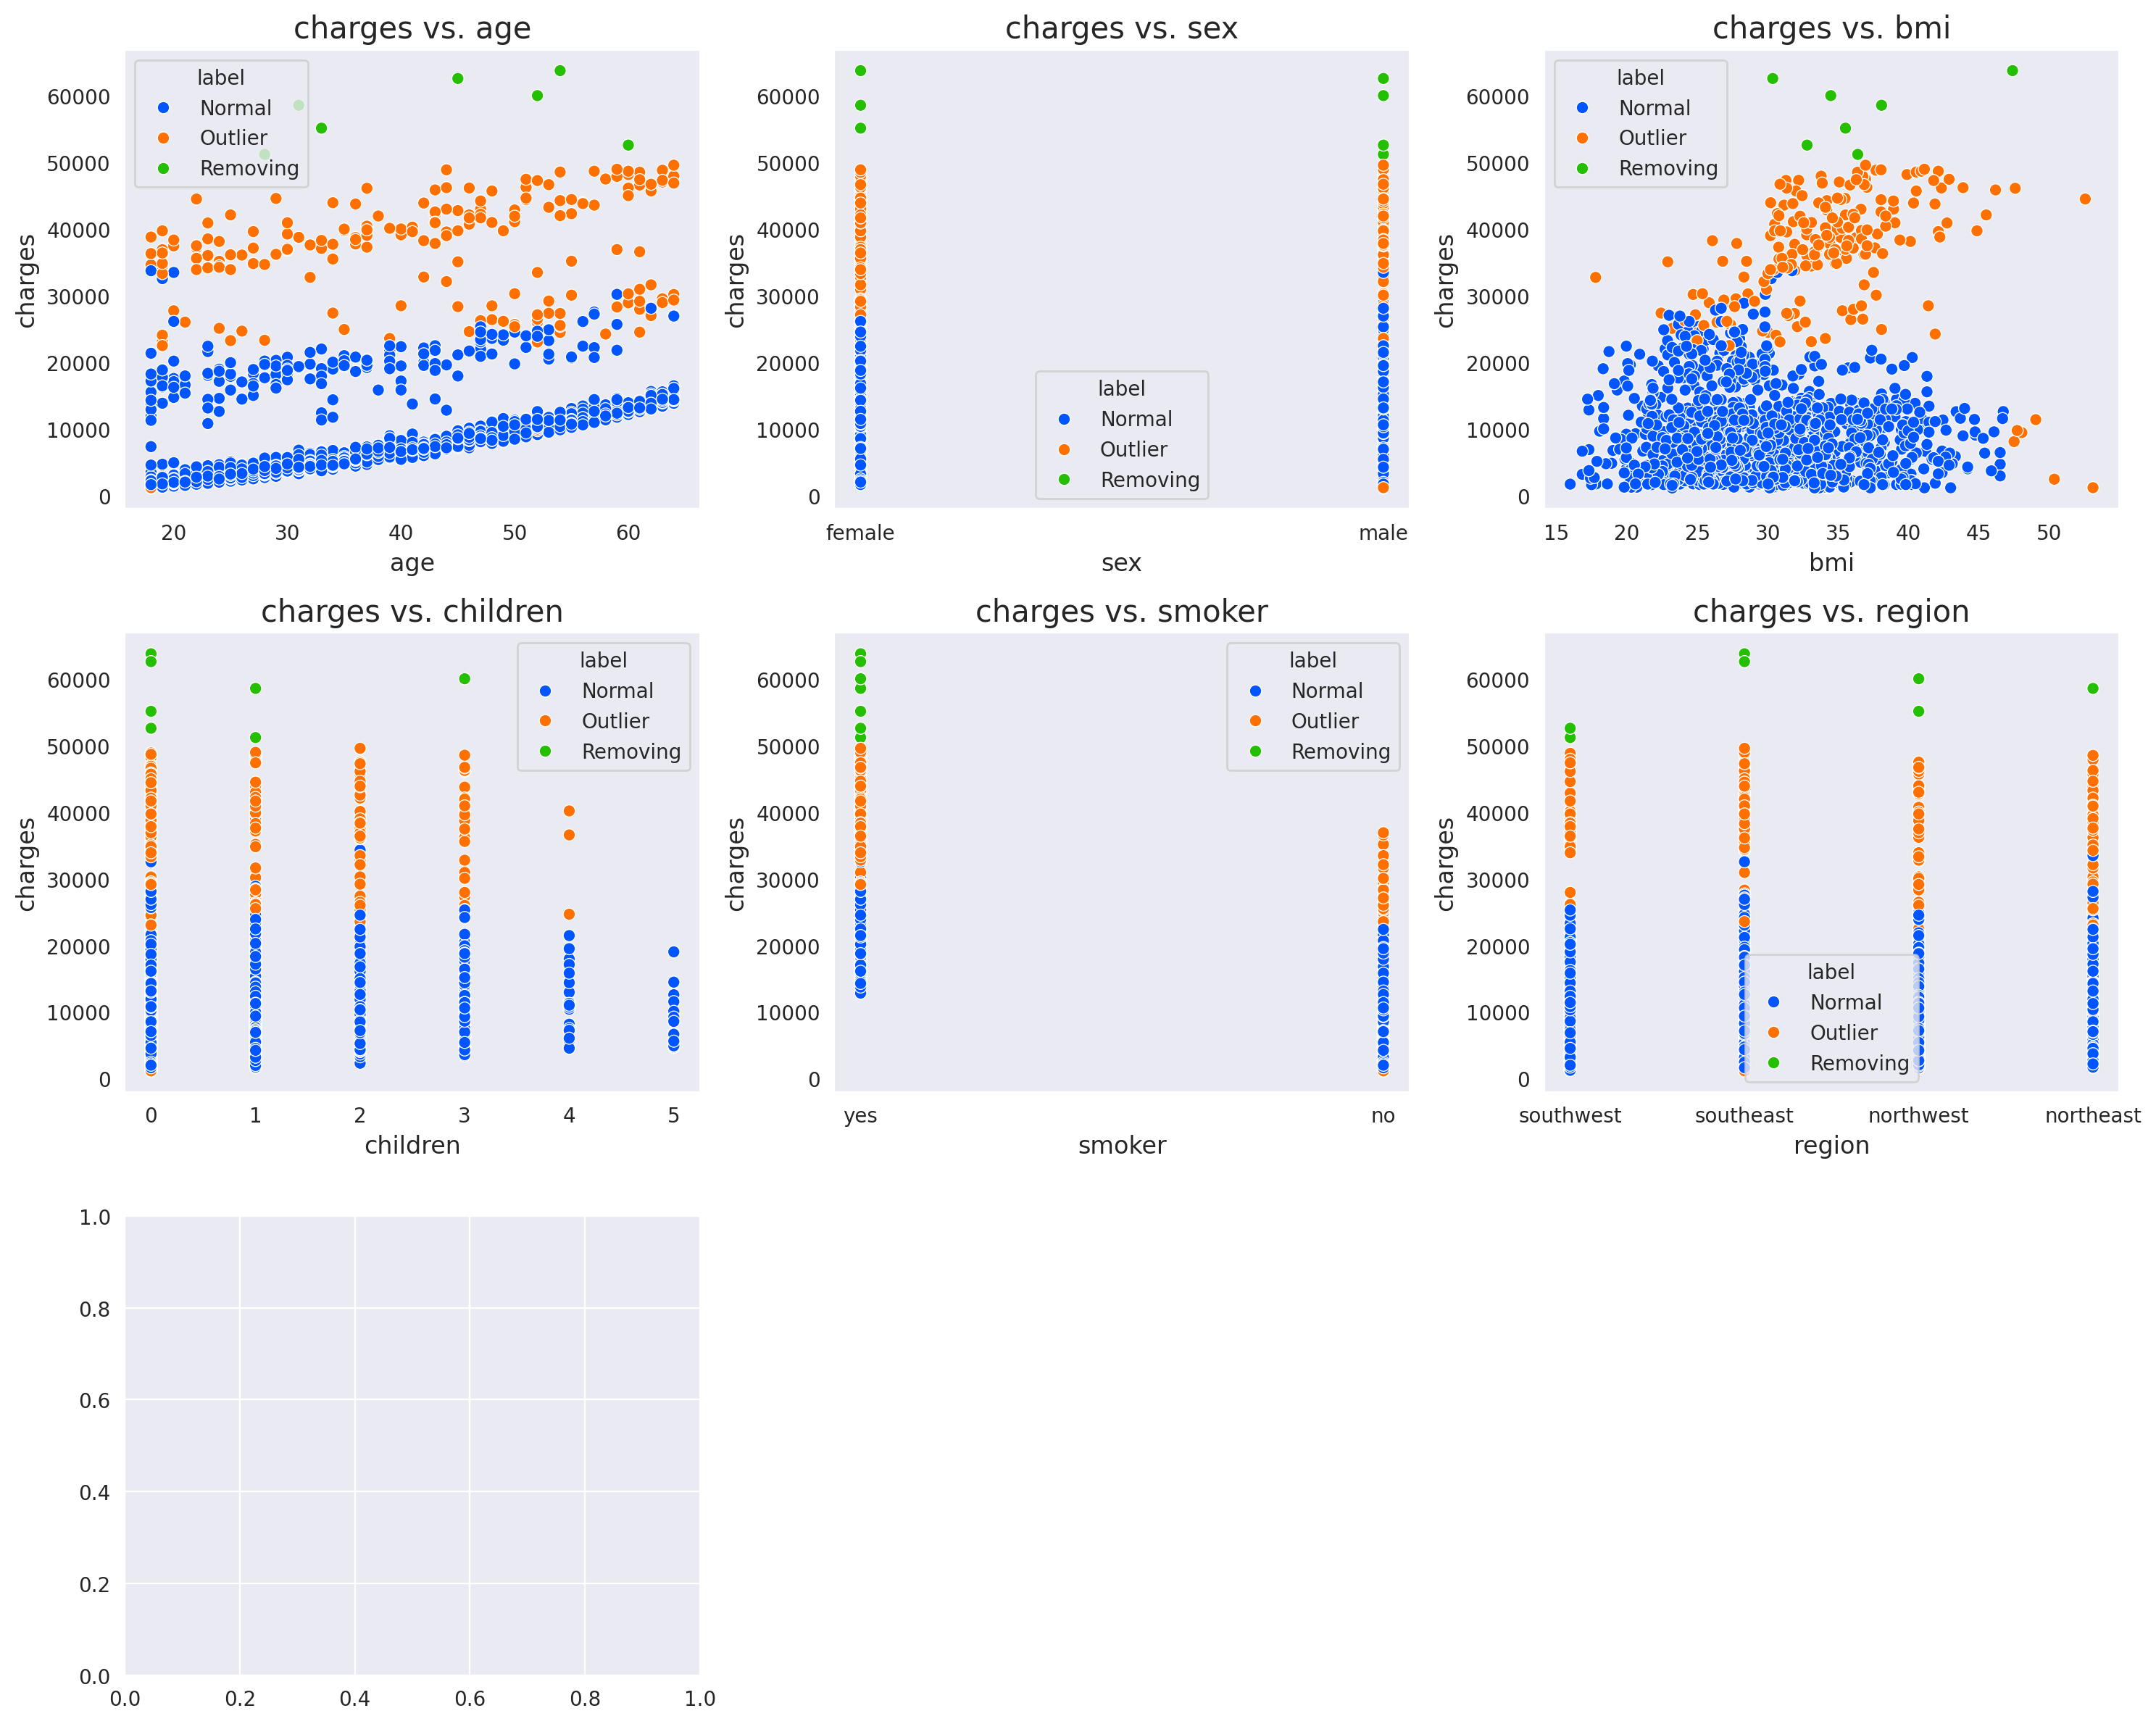

In [25]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>50000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
target = 'charges'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [26]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[577, 34, 1230, 819, 1300, 1146, 543]

In [27]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 72.9+ KB


In [44]:
target = 'region'
x = df1.drop('charges', axis=1).drop('bmi', axis=1).drop('region', axis=1)
x['smoker'] = x['smoker'].replace('yes', 1).replace('no', 0)
x['sex'] = x['sex'].replace('male', 1).replace('female', 0)
y = df1['region']

In [45]:
x

,age,sex,children,smoker
0,19,0,0,1
1,18,1,1,0
2,28,1,3,0
3,33,1,0,0
4,32,1,0,0
...,...,...,...,...
1326,50,1,3,0
1327,18,0,0,0
1328,18,0,0,0
1329,21,0,0,0


In [106]:
feature_names = x.columns

labels = y.unique()

X_train, test_x, y_train, test_lab = train_test_split(x,y,

                                                 test_size = 0.4,

                                                 random_state = 42)

In [47]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

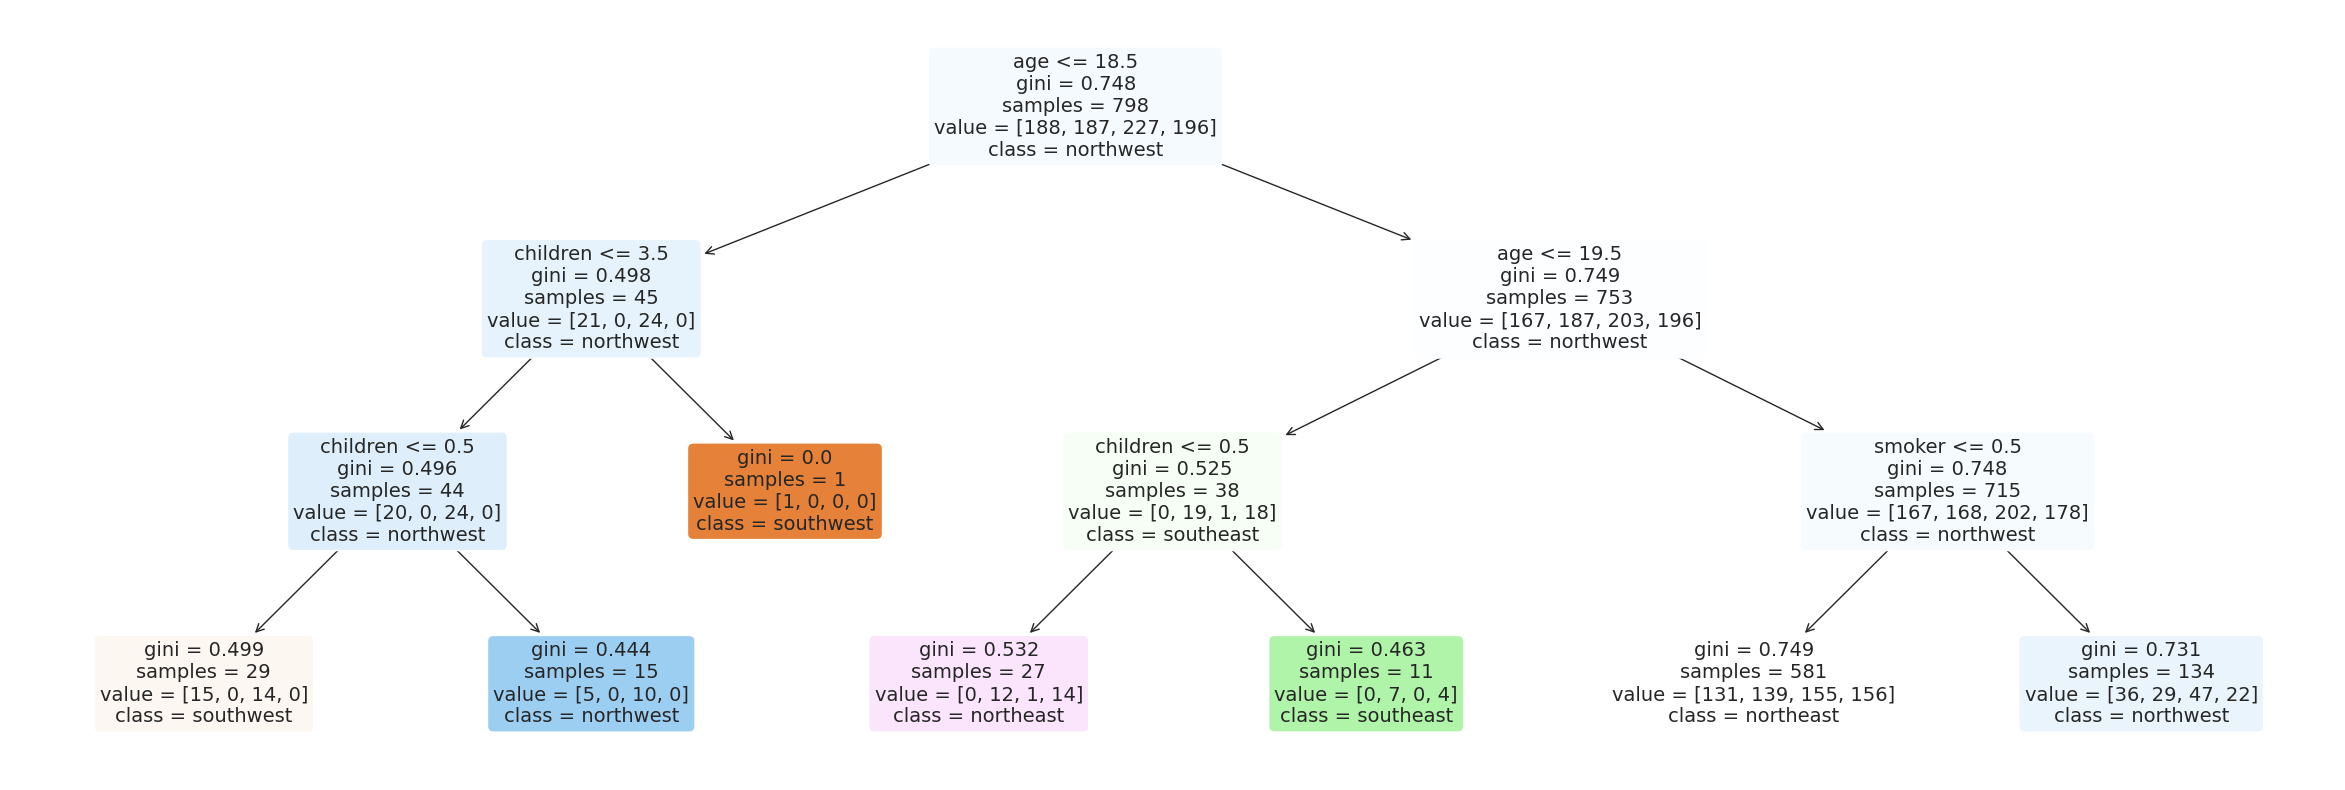

In [48]:
plt.figure(figsize=(30,10), facecolor ='w')

a = tree.plot_tree(clf,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=14)

plt.show()

In [49]:
tree_rules = export_text(clf,

                        feature_names = list(feature_names))

print(tree_rules)

|--- age <= 18.50
|   |--- children <= 3.50
|   |   |--- children <= 0.50
|   |   |   |--- class: northeast
|   |   |--- children >  0.50
|   |   |   |--- class: southeast
|   |--- children >  3.50
|   |   |--- class: northeast
|--- age >  18.50
|   |--- age <= 19.50
|   |   |--- children <= 0.50
|   |   |   |--- class: southwest
|   |   |--- children >  0.50
|   |   |   |--- class: northwest
|   |--- age >  19.50
|   |   |--- smoker <= 0.50
|   |   |   |--- class: southwest
|   |   |--- smoker >  0.50
|   |   |   |--- class: southeast



In [50]:
parametrs = { 'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [51]:
clf = DecisionTreeClassifier(random_state = 42)

In [52]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [53]:
grid.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [103]:
clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [104]:
model = clf.fit(X_train, y_train)

In [107]:
def model_evaluation(model, test_x, y_test, model_name):
    y_pred = model.predict(test_x)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model, test_x, test_lab, 'DecisionTree Reg.')

,DecisionTree Reg.
MAE,0.157211
MSE,0.157211
RMSE,0.396499
R2-Score,-0.190753


In [54]:
clf = RandomForestClassifier()

In [55]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [56]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [57]:
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 20}

2. Используя датасет по сердечным заболеваниям (https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression) выполните предобработку и анализ данных (задание прошлого занятия) и обучите модели дерева решений, случайного леса и бустинг (см. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). Сравните качество построенных моделей (без подбора гиперпараметров и с подбором гиперпараметров) по метрикам: accuracy, precision, recall и f1-score (см. статью https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [59]:
df = pd.read_csv('heart_disease.csv')

In [60]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [62]:
df1 = df.copy()
df1 = df1.dropna()

In [63]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [64]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [65]:
target = 'TenYearCHD'
x = df1.drop('TenYearCHD', axis=1)
y = df1['TenYearCHD']

In [95]:
feature_names = x.columns

labels = y.unique()

X_train, test_x, y_train, test_lab = train_test_split(x,y,

                                                 test_size = 0.4,

                                                 random_state = 42)

In [96]:
test_x

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
572,0,47,2.0,0,0.0,0.0,0,0,0,223.0,120.0,74.0,20.27,80.0,76.0
1309,0,34,2.0,0,0.0,0.0,0,0,0,170.0,121.0,74.0,20.82,67.0,83.0
1153,0,67,3.0,1,1.0,0.0,0,1,0,242.0,172.0,84.0,19.81,70.0,111.0
3679,0,42,2.0,1,2.0,0.0,0,0,0,230.0,124.0,80.0,24.87,90.0,77.0
1842,1,49,2.0,1,50.0,0.0,0,0,0,252.0,156.0,91.0,25.35,70.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,1,57,4.0,0,0.0,0.0,0,0,0,251.0,114.0,75.0,26.35,80.0,72.0
2111,0,55,3.0,1,35.0,0.0,0,0,0,275.0,144.5,88.5,27.05,72.0,79.0
1882,0,38,2.0,0,0.0,0.0,0,0,0,251.0,126.0,76.0,29.19,60.0,66.0
3566,0,43,2.0,1,20.0,0.0,0,0,0,291.0,106.0,65.0,23.83,68.0,82.0


In [113]:
test_lab

572     0
1309    0
1153    0
3679    0
1842    1
       ..
2057    0
2111    1
1882    0
3566    0
1586    0
Name: TenYearCHD, Length: 1463, dtype: int64

In [97]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [99]:
model = clf.fit(X_train, y_train)

In [114]:
def model_evaluation(model, test_x, y_test, model_name):
    y_pred = model.predict(test_x)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([accuracy, precision, recall, f1, R2_Score], index=['accuracy', 'precision', 'recall', 'f1-score', 'R2_Score'], columns=[model_name])

model_evaluation(model, test_x, test_lab, 'DecisionTree Reg.')

,DecisionTree Reg.
accuracy,0.842789
precision,0.488372
recall,0.091703
f1-score,0.154412
R2_Score,-0.190753


In [111]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [112]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

import optuna


def objective(trial):
    clf = SGDClassifier(random_state=0)
    for step in range(100):
        clf.partial_fit(X_train, y_train, np.unique(y))
        intermediate_value = clf.score(test_x, test_lab)
        trial.report(intermediate_value, step=step)
        if trial.should_prune():
            raise optuna.TrialPruned()

    return clf.score(test_x, test_lab)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)

[I 2024-04-05 08:46:09,627] A new study created in memory with name: no-name-05db2a0c-ad70-4407-9e6d-c5a02810c536
[I 2024-04-05 08:46:10,510] Trial 0 finished with value: 0.16131237183868763 and parameters: {}. Best is trial 0 with value: 0.16131237183868763.
[I 2024-04-05 08:46:11,641] Trial 1 finished with value: 0.16131237183868763 and parameters: {}. Best is trial 0 with value: 0.16131237183868763.
[I 2024-04-05 08:46:12,518] Trial 2 finished with value: 0.16131237183868763 and parameters: {}. Best is trial 0 with value: 0.16131237183868763.
